## Logic Based FizzBuzz Function [Software 1.0]

In [15]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation-The logic used is that if the integer is divisible by three and five. If so, FIZZBUZZ is returned. Else if it is divisible by three, FIZZ is printed. Else if it is divisible by five, BUZZ is returned. Else, OTHER is returned.
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [16]:
def createInputCSV(start,end,filename):
    
    # Why list in Python? - Since the training data, testing data (input files), and the output files are in CSV format,
    # the values are taken as a single list for input and output.
    inputData   = []
    outputData  = []
    
    # Why do we need training Data? - The training data is used by the program to learn how the output was generated for 
    # the given data and learn to replicate the action for any new set of data. Thus, the learning is supervised and 
    # the program trains with the training data. For a different set of data, which is the testing data, 
    # the program predicts the output.
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe? - A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion 
    # in rows and columns.It is used to hold the input integer and the output response.
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [17]:
def processData(dataset):
    
    # Why do we have to process? - Since the input is a number and output is a fizzbuzz representation of that number, 
    # the input data is converted to binary to turn it to a vector of activations.
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [18]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10? - The number 10 represents the range of the binary digits as in 2^10 has a range of 
        # 0 to 1023 unsigned integers.
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [19]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [63]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 1024
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model? - We need a suitable model to perform effective learning from the training data and 
    # to get the predictions for future data with maximum accuracy.
    
    # Why use Dense layer and then activation? - Dense layer is for creating the neural network and the activation gives 
    # the activation function of each of the layers.
    
    # Why use sequential model with layers? - The sequence imposes an order on the observations that must be preserved 
    # when training models and making predictions. Thus the sequential observation made while training the data 
    # are used in the model. 
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout? - It is the regularization technique that is used to prevent overfitting by dropping out units.
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax? - It is a normalized exponential function that is used in get values in the range (0,1)
    
    model.summary()
    
    # Why use categorical_crossentropy? - It is a loss function that deals with the penalty for inaccurate predictions.
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [64]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [65]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1024)              11264     
_________________________________________________________________
activation_15 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 4100      
_________________________________________________________________
activation_16 (Activation)   (None, 4)                 0         
Total params: 15,364
Trainable params: 15,364
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [66]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 0s 355us/step - loss: 1.2038 - acc: 0.4944 - val_loss: 1.1445 - val_acc: 0.5333
Epoch 2/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1540 - acc: 0.5333 - val_loss: 1.1454 - val_acc: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1511 - acc: 0.5333 - val_loss: 1.1453 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 42us/step - loss: 1.1477 - acc: 0.5333 - val_loss: 1.1642 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 36us/step - loss: 1.1413 - acc: 0.5333 - val_loss: 1.1440 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 40us/step - loss: 1.1412 - acc: 0.5333 - val_loss: 1.1422 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 42us/step - loss: 1.1400 - acc: 0.5333 - val_loss: 1.1472 - val_acc: 0.5333
E

720/720 [==============================] - 0s 35us/step - loss: 0.9238 - acc: 0.5625 - val_loss: 1.0677 - val_acc: 0.5500
Epoch 61/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9180 - acc: 0.5792 - val_loss: 1.0707 - val_acc: 0.5333
Epoch 62/10000
720/720 [==============================] - 0s 32us/step - loss: 0.9118 - acc: 0.5847 - val_loss: 1.0628 - val_acc: 0.5500
Epoch 63/10000
720/720 [==============================] - 0s 32us/step - loss: 0.9036 - acc: 0.5917 - val_loss: 1.0707 - val_acc: 0.5333
Epoch 64/10000
720/720 [==============================] - 0s 32us/step - loss: 0.8975 - acc: 0.5722 - val_loss: 1.0554 - val_acc: 0.5556
Epoch 65/10000
720/720 [==============================] - 0s 31us/step - loss: 0.9005 - acc: 0.5889 - val_loss: 1.0587 - val_acc: 0.5500
Epoch 66/10000
720/720 [==============================] - 0s 33us/step - loss: 0.8959 - acc: 0.5833 - val_loss: 1.0504 - val_acc: 0.5389
Epoch 67/10000
720/720 [==============================] 

Epoch 120/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6126 - acc: 0.8042 - val_loss: 0.8709 - val_acc: 0.6944
Epoch 121/10000
720/720 [==============================] - 0s 32us/step - loss: 0.6139 - acc: 0.8069 - val_loss: 0.8557 - val_acc: 0.6389
Epoch 122/10000
720/720 [==============================] - 0s 31us/step - loss: 0.6144 - acc: 0.8083 - val_loss: 0.8576 - val_acc: 0.6444
Epoch 123/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5926 - acc: 0.8347 - val_loss: 0.8586 - val_acc: 0.5944
Epoch 124/10000
720/720 [==============================] - 0s 32us/step - loss: 0.6032 - acc: 0.8125 - val_loss: 0.8613 - val_acc: 0.6778
Epoch 125/10000
720/720 [==============================] - 0s 32us/step - loss: 0.5941 - acc: 0.8292 - val_loss: 0.8834 - val_acc: 0.5722
Epoch 126/10000
720/720 [==============================] - 0s 35us/step - loss: 0.5669 - acc: 0.8042 - val_loss: 0.8634 - val_acc: 0.7444
Epoch 127/10000
720/720 [=========

720/720 [==============================] - 0s 33us/step - loss: 0.3965 - acc: 0.9278 - val_loss: 0.6757 - val_acc: 0.8167
Epoch 180/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3696 - acc: 0.9458 - val_loss: 0.6878 - val_acc: 0.7000
Epoch 181/10000
720/720 [==============================] - 0s 31us/step - loss: 0.3796 - acc: 0.9278 - val_loss: 0.6576 - val_acc: 0.8389
Epoch 182/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3821 - acc: 0.9333 - val_loss: 0.7000 - val_acc: 0.6778
Epoch 183/10000
720/720 [==============================] - 0s 36us/step - loss: 0.3830 - acc: 0.9167 - val_loss: 0.6577 - val_acc: 0.8167
Epoch 184/10000
720/720 [==============================] - 0s 32us/step - loss: 0.3725 - acc: 0.9333 - val_loss: 0.6605 - val_acc: 0.8222
Epoch 185/10000
720/720 [==============================] - 0s 35us/step - loss: 0.3715 - acc: 0.9319 - val_loss: 0.6484 - val_acc: 0.8556
Epoch 186/10000
720/720 [=========================

720/720 [==============================] - 0s 33us/step - loss: 0.2463 - acc: 0.9472 - val_loss: 0.5586 - val_acc: 0.8000
Epoch 239/10000
720/720 [==============================] - 0s 36us/step - loss: 0.2582 - acc: 0.9569 - val_loss: 0.6196 - val_acc: 0.7167
Epoch 240/10000
720/720 [==============================] - 0s 38us/step - loss: 0.2541 - acc: 0.9528 - val_loss: 0.5380 - val_acc: 0.8667
Epoch 241/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2446 - acc: 0.9653 - val_loss: 0.5279 - val_acc: 0.8778
Epoch 242/10000
720/720 [==============================] - 0s 35us/step - loss: 0.2487 - acc: 0.9611 - val_loss: 0.6193 - val_acc: 0.7278
Epoch 243/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2540 - acc: 0.9500 - val_loss: 0.5440 - val_acc: 0.8389
Epoch 244/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2354 - acc: 0.9694 - val_loss: 0.5250 - val_acc: 0.8500
Epoch 245/10000
720/720 [=========================

720/720 [==============================] - 0s 47us/step - loss: 0.1705 - acc: 0.9694 - val_loss: 0.5390 - val_acc: 0.8111
Epoch 298/10000
720/720 [==============================] - 0s 56us/step - loss: 0.1762 - acc: 0.9722 - val_loss: 0.4662 - val_acc: 0.8667
Epoch 299/10000
720/720 [==============================] - 0s 53us/step - loss: 0.1813 - acc: 0.9653 - val_loss: 0.5006 - val_acc: 0.8500
Epoch 300/10000
720/720 [==============================] - 0s 56us/step - loss: 0.1667 - acc: 0.9764 - val_loss: 0.4526 - val_acc: 0.8944
Epoch 301/10000
720/720 [==============================] - 0s 56us/step - loss: 0.1721 - acc: 0.9736 - val_loss: 0.4659 - val_acc: 0.8722
Epoch 302/10000
720/720 [==============================] - 0s 57us/step - loss: 0.1637 - acc: 0.9764 - val_loss: 0.4734 - val_acc: 0.8722
Epoch 303/10000
720/720 [==============================] - 0s 53us/step - loss: 0.1671 - acc: 0.9750 - val_loss: 0.4620 - val_acc: 0.8722
Epoch 304/10000
720/720 [=========================

720/720 [==============================] - 0s 45us/step - loss: 0.1277 - acc: 0.9806 - val_loss: 0.4409 - val_acc: 0.8722
Epoch 357/10000
720/720 [==============================] - 0s 45us/step - loss: 0.1340 - acc: 0.9750 - val_loss: 0.4214 - val_acc: 0.9111
Epoch 358/10000
720/720 [==============================] - 0s 39us/step - loss: 0.1343 - acc: 0.9792 - val_loss: 0.4031 - val_acc: 0.9111
Epoch 359/10000
720/720 [==============================] - 0s 33us/step - loss: 0.1216 - acc: 0.9833 - val_loss: 0.4339 - val_acc: 0.8944
Epoch 360/10000
720/720 [==============================] - 0s 33us/step - loss: 0.1177 - acc: 0.9833 - val_loss: 0.4773 - val_acc: 0.8333
Epoch 361/10000
720/720 [==============================] - 0s 35us/step - loss: 0.1392 - acc: 0.9736 - val_loss: 0.4578 - val_acc: 0.8500
Epoch 362/10000
720/720 [==============================] - 0s 36us/step - loss: 0.1259 - acc: 0.9764 - val_loss: 0.4732 - val_acc: 0.8556
Epoch 363/10000
720/720 [=========================

720/720 [==============================] - 0s 35us/step - loss: 0.0863 - acc: 0.9917 - val_loss: 0.4897 - val_acc: 0.8222
Epoch 416/10000
720/720 [==============================] - 0s 33us/step - loss: 0.1076 - acc: 0.9764 - val_loss: 0.3647 - val_acc: 0.9333
Epoch 417/10000
720/720 [==============================] - 0s 36us/step - loss: 0.0980 - acc: 0.9764 - val_loss: 0.4096 - val_acc: 0.9056
Epoch 418/10000
720/720 [==============================] - 0s 33us/step - loss: 0.1008 - acc: 0.9806 - val_loss: 0.3709 - val_acc: 0.9389
Epoch 419/10000
720/720 [==============================] - 0s 33us/step - loss: 0.1063 - acc: 0.9806 - val_loss: 0.3784 - val_acc: 0.9111
Epoch 420/10000
720/720 [==============================] - 0s 39us/step - loss: 0.1074 - acc: 0.9861 - val_loss: 0.4119 - val_acc: 0.8889
Epoch 421/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0994 - acc: 0.9819 - val_loss: 0.4622 - val_acc: 0.8389
Epoch 422/10000
720/720 [=========================

720/720 [==============================] - 0s 35us/step - loss: 0.0880 - acc: 0.9764 - val_loss: 0.4307 - val_acc: 0.8611
Epoch 475/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0827 - acc: 0.9861 - val_loss: 0.4317 - val_acc: 0.8722
Epoch 476/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0793 - acc: 0.9847 - val_loss: 0.3745 - val_acc: 0.9167
Epoch 477/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0817 - acc: 0.9861 - val_loss: 0.3548 - val_acc: 0.9389
Epoch 478/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0848 - acc: 0.9903 - val_loss: 0.4620 - val_acc: 0.8667
Epoch 479/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0940 - acc: 0.9833 - val_loss: 0.4347 - val_acc: 0.8778
Epoch 480/10000
720/720 [==============================] - 0s 36us/step - loss: 0.0734 - acc: 0.9931 - val_loss: 0.3791 - val_acc: 0.9278
Epoch 481/10000
720/720 [=========================

720/720 [==============================] - 0s 40us/step - loss: 0.0819 - acc: 0.9819 - val_loss: 0.4342 - val_acc: 0.8667
Epoch 534/10000
720/720 [==============================] - 0s 42us/step - loss: 0.0676 - acc: 0.9861 - val_loss: 0.4099 - val_acc: 0.9000
Epoch 535/10000
720/720 [==============================] - 0s 38us/step - loss: 0.0679 - acc: 0.9875 - val_loss: 0.3953 - val_acc: 0.8778
Epoch 536/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0845 - acc: 0.9806 - val_loss: 0.4768 - val_acc: 0.8833
Epoch 537/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0811 - acc: 0.9819 - val_loss: 0.4148 - val_acc: 0.9056
Epoch 538/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0611 - acc: 0.9917 - val_loss: 0.4341 - val_acc: 0.8667
Epoch 539/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0664 - acc: 0.9917 - val_loss: 0.3933 - val_acc: 0.9222
Epoch 540/10000
720/720 [=========================

720/720 [==============================] - 0s 33us/step - loss: 0.0572 - acc: 0.9903 - val_loss: 0.3860 - val_acc: 0.9111
Epoch 593/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0571 - acc: 0.9931 - val_loss: 0.5588 - val_acc: 0.8111
Epoch 594/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0515 - acc: 0.9958 - val_loss: 0.3638 - val_acc: 0.9167
Epoch 595/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0556 - acc: 0.9917 - val_loss: 0.4513 - val_acc: 0.8556
Epoch 596/10000
720/720 [==============================] - 0s 31us/step - loss: 0.0562 - acc: 0.9917 - val_loss: 0.3897 - val_acc: 0.9056
Epoch 597/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0631 - acc: 0.9847 - val_loss: 0.3863 - val_acc: 0.9167
Epoch 598/10000
720/720 [==============================] - ETA: 0s - loss: 0.0327 - acc: 1.000 - 0s 35us/step - loss: 0.0504 - acc: 0.9931 - val_loss: 0.5092 - val_acc: 0.8444
Epoch 599/10

720/720 [==============================] - 0s 33us/step - loss: 0.0497 - acc: 0.9917 - val_loss: 0.4134 - val_acc: 0.9167
Epoch 652/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0549 - acc: 0.9861 - val_loss: 0.3649 - val_acc: 0.9111
Epoch 653/10000
720/720 [==============================] - 0s 36us/step - loss: 0.0528 - acc: 0.9931 - val_loss: 0.3781 - val_acc: 0.9167
Epoch 654/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0551 - acc: 0.9903 - val_loss: 0.3588 - val_acc: 0.9056
Epoch 655/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0641 - acc: 0.9806 - val_loss: 0.3273 - val_acc: 0.9389
Epoch 656/10000
720/720 [==============================] - 0s 36us/step - loss: 0.0579 - acc: 0.9889 - val_loss: 0.4202 - val_acc: 0.8944
Epoch 657/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0451 - acc: 0.9931 - val_loss: 0.4180 - val_acc: 0.9056
Epoch 658/10000
720/720 [=========================

720/720 [==============================] - 0s 46us/step - loss: 0.0398 - acc: 0.9931 - val_loss: 0.3565 - val_acc: 0.9167
Epoch 711/10000
720/720 [==============================] - 0s 45us/step - loss: 0.0454 - acc: 0.9889 - val_loss: 0.4169 - val_acc: 0.8889
Epoch 712/10000
720/720 [==============================] - 0s 56us/step - loss: 0.0547 - acc: 0.9861 - val_loss: 0.4579 - val_acc: 0.8667
Epoch 713/10000
720/720 [==============================] - 0s 40us/step - loss: 0.0527 - acc: 0.9889 - val_loss: 0.4286 - val_acc: 0.8833
Epoch 714/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0419 - acc: 0.9931 - val_loss: 0.3862 - val_acc: 0.8944
Epoch 715/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0435 - acc: 0.9903 - val_loss: 0.4209 - val_acc: 0.8944
Epoch 716/10000
720/720 [==============================] - 0s 39us/step - loss: 0.0589 - acc: 0.9833 - val_loss: 0.3461 - val_acc: 0.9278
Epoch 717/10000
720/720 [=========================

720/720 [==============================] - 0s 35us/step - loss: 0.0363 - acc: 0.9944 - val_loss: 0.3919 - val_acc: 0.9222
Epoch 770/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0472 - acc: 0.9889 - val_loss: 0.4175 - val_acc: 0.9000
Epoch 771/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0437 - acc: 0.9889 - val_loss: 0.4356 - val_acc: 0.8944
Epoch 772/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0376 - acc: 0.9931 - val_loss: 0.3719 - val_acc: 0.9278
Epoch 773/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0536 - acc: 0.9847 - val_loss: 0.3806 - val_acc: 0.9111
Epoch 774/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0420 - acc: 0.9861 - val_loss: 0.5161 - val_acc: 0.8833
Epoch 775/10000
720/720 [==============================] - 0s 38us/step - loss: 0.0532 - acc: 0.9861 - val_loss: 0.3518 - val_acc: 0.9333
Epoch 776/10000
720/720 [=========================

720/720 [==============================] - 0s 43us/step - loss: 0.0336 - acc: 0.9944 - val_loss: 0.3749 - val_acc: 0.9278
Epoch 829/10000
720/720 [==============================] - 0s 42us/step - loss: 0.0414 - acc: 0.9931 - val_loss: 0.4504 - val_acc: 0.8722
Epoch 830/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0401 - acc: 0.9875 - val_loss: 0.4000 - val_acc: 0.9222
Epoch 831/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0407 - acc: 0.9917 - val_loss: 0.3142 - val_acc: 0.9389
Epoch 832/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0392 - acc: 0.9903 - val_loss: 0.5068 - val_acc: 0.8444
Epoch 833/10000
720/720 [==============================] - 0s 36us/step - loss: 0.0479 - acc: 0.9847 - val_loss: 0.5219 - val_acc: 0.8444
Epoch 834/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0334 - acc: 0.9972 - val_loss: 0.3545 - val_acc: 0.9222
Epoch 835/10000
720/720 [=========================

720/720 [==============================] - 0s 33us/step - loss: 0.0423 - acc: 0.9889 - val_loss: 0.4470 - val_acc: 0.9056
Epoch 888/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0350 - acc: 0.9931 - val_loss: 0.4237 - val_acc: 0.9111
Epoch 889/10000
720/720 [==============================] - 0s 36us/step - loss: 0.0500 - acc: 0.9833 - val_loss: 0.4471 - val_acc: 0.8889
Epoch 890/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0291 - acc: 0.9944 - val_loss: 0.5561 - val_acc: 0.8389
Epoch 891/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0438 - acc: 0.9903 - val_loss: 0.4245 - val_acc: 0.8944
Epoch 892/10000
720/720 [==============================] - 0s 36us/step - loss: 0.0376 - acc: 0.9931 - val_loss: 0.3426 - val_acc: 0.9222
Epoch 893/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0477 - acc: 0.9861 - val_loss: 0.3752 - val_acc: 0.9056
Epoch 894/10000
720/720 [=========================

720/720 [==============================] - 0s 35us/step - loss: 0.0450 - acc: 0.9889 - val_loss: 0.3444 - val_acc: 0.9333
Epoch 947/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0401 - acc: 0.9944 - val_loss: 0.3995 - val_acc: 0.9056
Epoch 948/10000
720/720 [==============================] - 0s 36us/step - loss: 0.0311 - acc: 0.9889 - val_loss: 0.4829 - val_acc: 0.8833
Epoch 949/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0265 - acc: 0.9944 - val_loss: 0.3006 - val_acc: 0.9444
Epoch 950/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0370 - acc: 0.9931 - val_loss: 0.4636 - val_acc: 0.8778
Epoch 951/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0356 - acc: 0.9944 - val_loss: 0.4782 - val_acc: 0.8667
Epoch 952/10000
720/720 [==============================] - 0s 31us/step - loss: 0.0258 - acc: 0.9944 - val_loss: 0.3225 - val_acc: 0.9278
Epoch 953/10000
720/720 [=========================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018ED01A6198>,
      dtype=object)

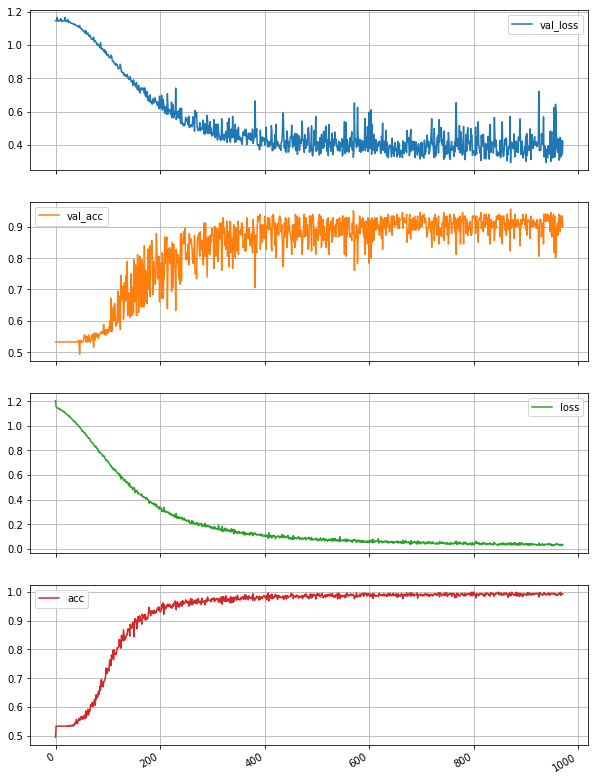

In [67]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [68]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [69]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# UBID - svikrama
# personNumber - 50291969
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "svikrama")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50291969")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 7  Correct :93
Testing Accuracy: 93.0
